In [3]:
# Packages
import pickle
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
import nltk, spacy, re, json
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.stem import PorterStemmer
nltk.download("punkt")
nltk.download('stopwords')

# Set up
% matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)

[nltk_data] Downloading package punkt to /jet/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /jet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Import elon's tesla related tweets

In [5]:
# import elon's tweets filtered by 'telsa' related keywords
filename="../../data/twitter/elon_main_2019_05_07_jing.csv"

In [6]:
elon = pd.read_csv(filename)

In [7]:
elon.head()

,Unnamed: 0,Datetime,retweets,favorites,text,id,emoji,isreply,replyto,origin
0,0,2019-04-14 23:31:00+00:00,107,4213,starship will land on a ring of fire,1117571159195668480,NaN,True,jasonsellspa,1.117564e+18
1,1,2019-04-14 23:10:00+00:00,83,4981,6.5,1117565769829818368,NaN,True,JaneidyEve,1.117564e+18
2,2,2019-04-14 23:06:00+00:00,61,4041,yes,1117564774190075904,NaN,True,Johankyu7,1.117564e+18
3,3,2019-04-14 23:02:00+00:00,10739,117153,winter is coming,1117563769159286784,NaN,False,NaN,1.117564e+18
4,4,2019-04-14 23:01:00+00:00,12245,162803,thinking about adding giant stainless steel dragon wings to starship,1117563679099240449,NaN,False,NaN,1.117564e+18


In [8]:
elon.shape

(6251, 10)

In [9]:
tweets_text=elon['text']

In [10]:
tweets_text

0       starship will land on a ring of fire                                                                                                                                                                                                                                                   
1       6.5                                                                                                                                                                                                                                                                                    
2       yes                                                                                                                                                                                                                                                                                    
3       winter is coming                                                                                                                

In [468]:
### Stanford NLP package for sentiment scores
# import time
# from socket import error as SocketError
# from statistics import mean 
# from pycorenlp import StanfordCoreNLP
# import math

# def StandfordSentimental(text):
#     time.sleep(1)
#     if text != None:
#         try:
#     #         print(text)
#             nlp = StanfordCoreNLP('http://localhost:9000')
#             res = nlp.annotate(text, properties={
#                                'annotators': 'sentiment',
#                                'outputFormat': 'json',
#                                'timeout': 5000
#                            })
#             sentimental = []

#             if (type(res) == str):
#                 print(res)
#                 print(text)
#                 return 1000
#             for s in res["sentences"]:
#                 sentimental = sentimental + [int(s["sentimentValue"])]
#             return mean(sentimental)
#         except SocketError as e:
#             print(e)
#             return(1000)
#     else:
#         return(1000)

In [469]:
# tweets_sentiment_stanford = []
# for tweet in tweets_text:
#     tweets_sentiment_stanford.append(StandfordSentimental(tweet))

In [470]:
# text = '''will communicate better in the future. too many people want us to fail and are willing to twist any bit of news against tesla. '''
# blob = TextBlob(text)
# #blob.tags
# #blob.sentences

# for sentence in blob.sentences:
#     print(sentence.sentiment)

### Create sentiment scores of elon's tweets

In [11]:
### Obtain sentiment(polarity) and subjectivity for each tweet at sentence level with TextBlob package
tweets_sentiment_polarity = []
tweets_sentiment_subjectivity = []
for tweet in tweets_text:
    blob = TextBlob(tweet)
    polarity = []
    subjectivity = []
    
    for sentence in blob.sentences:
        polarity.append(sentence.sentiment.polarity)
        subjectivity.append(sentence.sentiment.subjectivity)
        
    tweet_polarity = sum(polarity)/len(blob.sentences)
    tweet_subjectivity = sum(subjectivity)/len(blob.sentences)
    
    tweets_sentiment_polarity.append(tweet_polarity)
    tweets_sentiment_subjectivity.append(tweet_subjectivity)

In [12]:
len(tweets_sentiment_polarity)

6251

In [13]:
len(tweets_sentiment_subjectivity)

6251

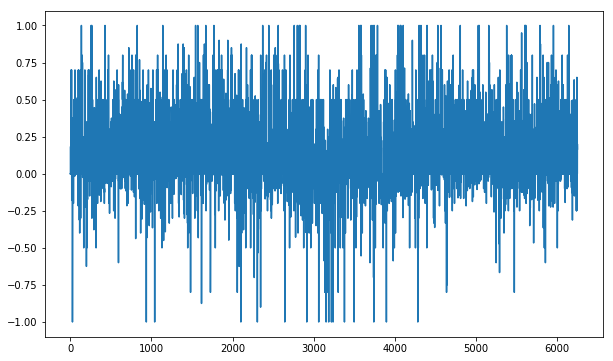

In [14]:
plt.figure(figsize = (10,6))
plt.plot(tweets_sentiment_polarity);

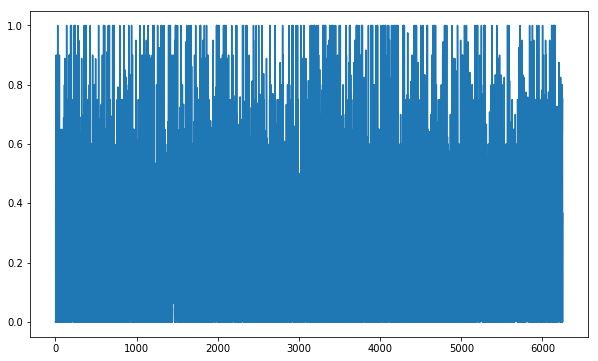

In [15]:
plt.figure(figsize = (10,6))
plt.plot(tweets_sentiment_subjectivity);

In [16]:
sentiment_cols = pd.DataFrame(list(zip(tweets_sentiment_polarity, 
                                       tweets_sentiment_subjectivity)), columns = ['sentiment', 'subjectivity'])

In [17]:
elon

,Unnamed: 0,Datetime,retweets,favorites,text,id,emoji,isreply,replyto,origin
0,0,2019-04-14 23:31:00+00:00,107,4213,starship will land on a ring of fire,1117571159195668480,NaN,True,jasonsellspa,1.117564e+18
1,1,2019-04-14 23:10:00+00:00,83,4981,6.5,1117565769829818368,NaN,True,JaneidyEve,1.117564e+18
2,2,2019-04-14 23:06:00+00:00,61,4041,yes,1117564774190075904,NaN,True,Johankyu7,1.117564e+18
3,3,2019-04-14 23:02:00+00:00,10739,117153,winter is coming,1117563769159286784,NaN,False,NaN,1.117564e+18
4,4,2019-04-14 23:01:00+00:00,12245,162803,thinking about adding giant stainless steel dragon wings to starship,1117563679099240449,NaN,False,NaN,1.117564e+18
5,5,2019-04-14 22:54:00+00:00,131,5201,"that tweet did take immense effort fair point tho. powerwall production is now ramping fast. tesla was cell-starved last year, so we had to switch all lines to make packs for cars, which meant powerwall production was living off scraps.",1117561885040283648,🤣 🤣,True,EforElectric,1.117554e+18
6,6,2019-04-14 22:46:00+00:00,65,2181,deal,1117559770955812865,NaN,True,yourloyalpal,1.117554e+18
7,7,2019-04-14 22:21:00+00:00,4864,54282,please support my campaign to rebrand @ wsj as emoji!,1117553530615648256,🧦,False,NaN,1.117554e+18
8,8,2019-04-14 22:17:00+00:00,2073,42205,"at some point, @ theonion and i should just a get a room …",1117552423373918208,NaN,False,NaN,1.117552e+18
9,9,2019-04-14 22:14:00+00:00,177,1979,just use this handy guidehttps://www.theonion.com/the-onion-s-guide-to-blockchain-technology-1829819640 …,1117551672039841793,NaN,True,techreview,1.117533e+18


In [18]:
elon_features=elon[['id','Datetime', 'text']]
elon_features=elon_features.join(sentiment_cols)

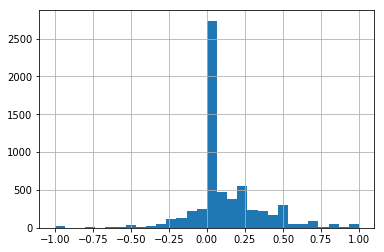

In [19]:
elon_features['sentiment'].hist(bins=30);

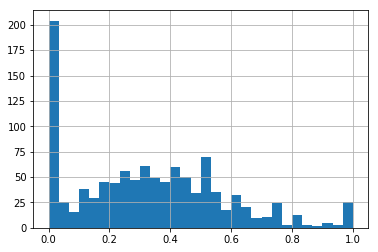

In [18]:
elon_features['subjectivity'].hist(bins=30);

In [19]:
elon_features.shape

(1077, 5)

In [20]:
elon_features

,id,Datetime,text,sentiment,subjectivity
0,1117561885040283648,2019-04-14 22:54:00+00:00,"that tweet did take immense effort fair point tho. powerwall production is now ramping fast. tesla was cell-starved last year, so we had to switch all lines to make packs for cars, which meant powerwall production was living off scraps.",0.183333,0.538889
1,1117519699930013696,2019-04-14 20:07:00+00:00,i’ve always thought that the fundamental good of tesla should be measured by the number of years by which it accelerates the transition to sustainable transport & energy,0.700000,0.600000
2,1117518012926402560,2019-04-14 20:00:00+00:00,"i’m sorry, fred, but wsj has relentlessly attacked tesla with bogus articles for over a decade. they can’t *all* be chalked up to poor reporting. where are the wsj exposé pieces on oil, coal & gas? that industry is 1000 times bigger than tesla. perhaps they’re all angels …",-0.180000,0.420000
3,1117509874831609856,2019-04-14 19:28:00+00:00,"very much so. there are 2.5b cars & trucks on earth. even replacing 1% of that fleet would require making 25m vehicles per year. tesla will make over 500k cars in next 12 months, but that’s a mere 2% of 25m or 0.02% of global vehicle fleet. car industry slow -> demand >> supply.",-0.041333,0.165333
4,1117507646804807681,2019-04-14 19:19:00+00:00,"sentry mode fundamentally empowers the individual car owner over entrenched interests, in this case a corrupt traffic judge. even tesla doesn’t have access to the video unless sent to us by owner.",-0.125000,0.350000
5,1117347290585243648,2019-04-14 08:42:00+00:00,"there is 35 gwh/yr “theoretical capacity”, but actual max output is ~2/3. it was physically impossible to make more model 3’s in q1 due to cell constraints.",-0.048611,0.362500
6,1117155252795346944,2019-04-13 19:59:00+00:00,"yes, all cars with autopilot 2.0 or higher, so ~400,000 of tesla cars built to date",0.250000,0.500000
7,1117144865299501056,2019-04-13 19:17:00+00:00,incorrect. pana cell lines at giga are only at ~24gwh/yr & have been a constraint on model 3 output since july. no choice but to use other suppliers for powerwall/powerpack cells. tesla won’t spend money on more capacity until existing lines get closer to 35gwh theoretical.,0.031250,0.418750
8,1117118581865476096,2019-04-13 17:33:00+00:00,tesla will start fsd computer upgrade in a few months,-0.200000,0.100000
9,1117116982778679297,2019-04-13 17:26:00+00:00,please note that the price of the tesla full self-driving option will increase substantially over time,0.350000,0.550000


### Update sentiments for emoji tweets  

In [20]:
elon[['text', 'emoji']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6251 entries, 0 to 6250
Data columns (total 2 columns):
text     6251 non-null object
emoji    186 non-null object
dtypes: object(2)
memory usage: 97.8+ KB


In [21]:
elon[elon['emoji'].isna() == True][['emoji']] = ' '

In [22]:
#filter tweets contain emojis 
elon_emoji = elon[elon['emoji'].isna() == False][['text', 'emoji']]
elon_emoji_text = elon_emoji['text'] + (elon_emoji['emoji'])

# elon_emoji = elon[['text', 'emoji']]
# elon_emoji_text = elon_emoji['text'] + (elon_emoji['emoji'])

In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return (dict(score))

In [24]:
### update sentiment scores for tweets contains emojis
update_emoji_sentiment = []
for tweet in elon_emoji_text:
    output = sentiment_analyzer_scores(tweet)
    update_emoji_sentiment.append(output['compound'])

In [489]:
elon_features.iloc[elon_emoji_text.index.values]['sentiment'] = update_emoji_sentiment

### Save sentiment features 

In [490]:
# write csv contains sentiment and polarity scores for elon's 'telsa' related tweets (1077 rows)
with open('../../data/features/2019_05_07_nlp_sentiments_jing.pickle', 'wb') as file:
        pickle.dump(elon_features, file, protocol=pickle.HIGHEST_PROTOCOL)